## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io, transform
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%load_ext memory_profiler
random.seed(1)

## Importing train and test datasets

In [2]:
traindf=pd.read_csv('C:/Users/subha/OneDrive/Documents/fashion_task3/fashion-mnist_train.csv')
testdf=pd.read_csv('C:/Users/subha/OneDrive/Documents/fashion_task3/fashion-mnist_test.csv')


In [3]:
traindf


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testdf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


## Count unique values of labels

In [7]:
print(traindf['label'].value_counts())
print('\n')

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64




In [8]:
print(testdf['label'].value_counts())
print('\n')

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64




## Finding null values

In [9]:
traindf.isnull().sum().max()

0

In [10]:
testdf.isnull().sum().max()

0

## Train test split

In [11]:
train_data=np.array(traindf,dtype='float32')
test_data=np.array(testdf,dtype='float32')
X_train=train_data[:, 1:]/255  #to normalise the dataset ,we divide each value by the maximum pixel value i.e,255
y_train=train_data[:,0]

X_test=test_data[:, 1:]/255 #to normalise the dataset ,we divide each value by the maximum pixel value i.e,255
y_test=test_data[:,0]


Each training and test example is assigned to one of the following labels:<br>

0 T-shirt/top<br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>

## Visual representation of the dataset

In [12]:
labels1=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [13]:
def plotting(n, m, data, labels, names):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        for j in range(m):
            index = i*m + j
            plt.subplot(n, m, index + 1)
            plt.axis("off")
            plt.imshow(data[index].reshape(28, 28)*255, interpolation="bilinear", cmap="binary")
            plt.title(names[int(labels[index])], fontsize = 10)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

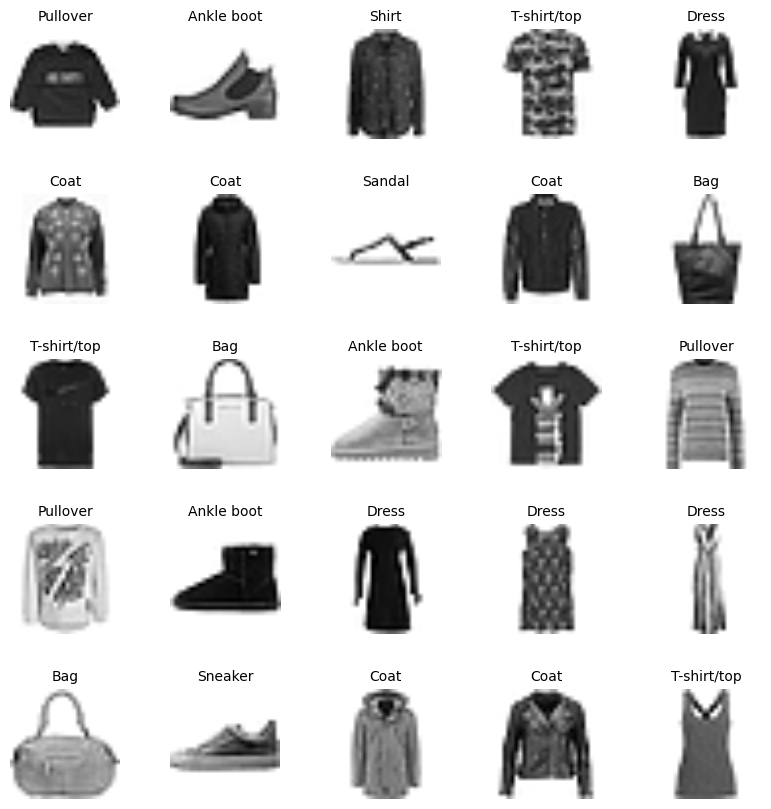

In [14]:
plotting(5, 5, X_train, y_train, labels1)

## PCA to reduce the dimensionality of the data

In [15]:
from sklearn.decomposition import PCA
pca = PCA(.95)#chooses the minimum number of principal components such that 95 percent of the variance is retained

In [16]:
pca.fit(X_train)

PCA(n_components=0.95)

In [17]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [18]:
X_train.shape

(60000, 187)

By PCA,the number of features reduced from 784 to 187

In [25]:
import time
import timeit


## Training the model

The performance of a logistic regression model when we only have 50 labeled instances

In [19]:
n_labeled =50

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs",random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.6269

## Inertia plot

In [21]:
df1=pd.DataFrame(X_train)
df2=pd.DataFrame(y_train)
data=pd.concat([df1, df2], axis=1)

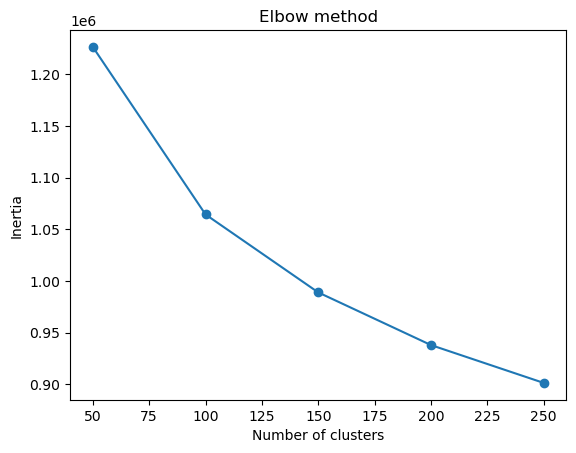

In [33]:
 
from sklearn.cluster import KMeans   
inertias = []

for i in range(50,300,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(50,300,50), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [32]:
from sklearn.cluster import KMeans

## K Means by only labelling the centroid of the cluster

In [55]:

def kmeansclusterk(k):
    
    start_dt = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    X_dist = kmeans.fit_transform(X_train)
    representative_pic = np.argmin(X_dist, axis=0)
    X_representative = X_train[representative_pic]
    y_representative=y_train[representative_pic]
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
    log_reg.fit(X_representative, y_representative)
    stop_dt = time.time()
    score=log_reg.score(X_test, y_test)
    print("for k=",k,"accuracy is",score)
    execution_time_dt = stop_dt - start_dt
    print("execution time for k=",k,"is",execution_time_dt,"sec")
    pred_y = log_reg.predict(X_test)
    cm = classification_report(y_test, pred_y)
    print("The Classification report: \n")
    print(cm)
    
   

    



In [56]:
kmeansclusterk(50)

for k= 50 accuracy is 0.6789
execution time for k= 50 is 42.8925724029541 sec
The Classification report: 

              precision    recall  f1-score   support

         0.0       0.59      0.77      0.67      1000
         1.0       0.97      0.92      0.94      1000
         2.0       0.50      0.75      0.60      1000
         3.0       0.94      0.45      0.60      1000
         4.0       0.53      0.45      0.49      1000
         5.0       0.93      0.32      0.48      1000
         6.0       0.49      0.47      0.48      1000
         7.0       0.56      0.93      0.70      1000
         8.0       0.90      0.85      0.88      1000
         9.0       0.86      0.89      0.87      1000

    accuracy                           0.68     10000
   macro avg       0.73      0.68      0.67     10000
weighted avg       0.73      0.68      0.67     10000



In [53]:
kmeansclusterk(100)

for k= 100 accuracy is 0.7378
execution time for k= 100 is 82.74024224281311 sec
The Confusion Matrix: 

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      1000
         1.0       0.98      0.91      0.94      1000
         2.0       0.69      0.54      0.61      1000
         3.0       0.77      0.82      0.80      1000
         4.0       0.60      0.42      0.50      1000
         5.0       0.84      0.70      0.76      1000
         6.0       0.40      0.57      0.47      1000
         7.0       0.76      0.83      0.80      1000
         8.0       0.84      0.91      0.88      1000
         9.0       0.83      0.93      0.88      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [57]:
kmeansclusterk(150)

for k= 150 accuracy is 0.7689
execution time for k= 150 is 127.16649293899536 sec
The Classification report: 

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      1000
         1.0       0.98      0.93      0.95      1000
         2.0       0.61      0.74      0.67      1000
         3.0       0.88      0.74      0.80      1000
         4.0       0.66      0.65      0.65      1000
         5.0       0.80      0.78      0.79      1000
         6.0       0.54      0.49      0.52      1000
         7.0       0.81      0.81      0.81      1000
         8.0       0.89      0.91      0.90      1000
         9.0       0.83      0.92      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



## Propagating the labels to all the other instances in the same cluster

In [46]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
k1=100
start_dt = time.time()
kmeans = KMeans(n_clusters=k1, random_state=42)
X_dist = kmeans.fit_transform(X_train)
representative_pic = np.argmin(X_dist, axis=0)
X_representative = X_train[representative_pic]
y_representative=y_train[representative_pic]
for i in range(k1):
    y_train_propagated[kmeans.labels_==i] = y_representative[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter = 5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
stop_dt = time.time()
print("for k=",k1,"accuracy is",log_reg.score(X_test, y_test))
execution_time_dt = stop_dt - start_dt
print("execution time for k=",k1,"is",execution_time_dt,"sec")

for k= 100 accuracy is 0.7244
execution time for k= 100 is 173.6231071949005 sec


## Propagating the labels to the 20th percentile closest to the centroid

In [49]:
k1=100
percentile_closest = 20
start_dt1 = time.time()
kmeans1 = KMeans(n_clusters=k1, random_state=42)
X_dist = kmeans1.fit_transform(X_train)
X_cluster_dist = X_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k1):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg1 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter = 5000, random_state=42)
log_reg1.fit(X_train_partially_propagated, y_train_partially_propagated)
stop_dt1 = time.time()
execution_time_dt = stop_dt1 - start_dt1
print("for k=",k1,"accuracy is",log_reg1.score(X_test, y_test))
print("execution time for k=",k1,"is",execution_time_dt,"sec")


for k= 100 accuracy is 0.72
execution time for k= 100 is 90.60438919067383 sec
